In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.0 MB/s eta 0:00:00


In [ ]:
pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_csv('/Fraud.csv')


In [ ]:
df1.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341829 entries, 0 to 341828
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            341829 non-null  int64  
 1   type            341829 non-null  object 
 2   amount          341829 non-null  float64
 3   nameOrig        341829 non-null  object 
 4   oldbalanceOrg   341829 non-null  float64
 5   newbalanceOrig  341829 non-null  float64
 6   nameDest        341828 non-null  object 
 7   oldbalanceDest  341828 non-null  float64
 8   newbalanceDest  341828 non-null  float64
 9   isFraud         341828 non-null  float64
 10  isFlaggedFraud  341828 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 28.7+ MB


In [ ]:
df1.shape


(341829, 11)

In [ ]:
df1.isFraud.value_counts()

0.0    341635
1.0       193
Name: isFraud, dtype: int64

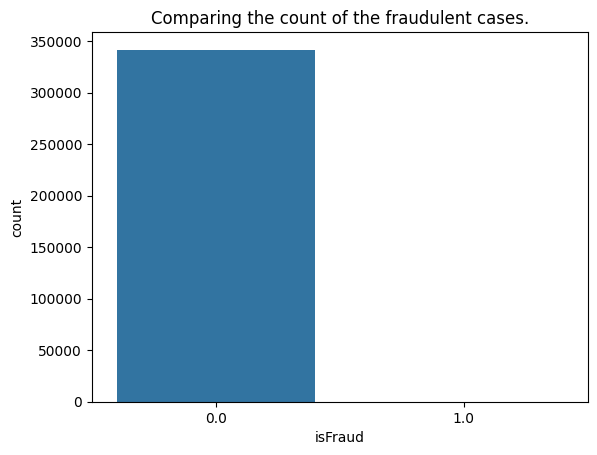

In [ ]:
sns.countplot(x='isFraud', data=df1)
plt.title('Comparing the count of the fraudulent cases.')
plt.show()

In [ ]:
df1.type.value_counts()

CASH_OUT    121306
PAYMENT     116665
CASH_IN      73083
TRANSFER     28302
DEBIT         2473
Name: type, dtype: int64

In [ ]:
df1['type'].replace('CASH_OUT',1,inplace=True)
df1['type'].replace('PAYMENT',2,inplace=True)
df1['type'].replace('CASH_IN',3,inplace=True)
df1['type'].replace('TRANSFER',3,inplace=True)
df1['type'].replace('DEBIT',3,inplace=True)


In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341829 entries, 0 to 341828
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            341829 non-null  int64  
 1   type            341829 non-null  int64  
 2   amount          341829 non-null  float64
 3   nameOrig        341829 non-null  object 
 4   oldbalanceOrg   341829 non-null  float64
 5   newbalanceOrig  341829 non-null  float64
 6   nameDest        341828 non-null  object 
 7   oldbalanceDest  341828 non-null  float64
 8   newbalanceDest  341828 non-null  float64
 9   isFraud         341828 non-null  float64
 10  isFlaggedFraud  341828 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 28.7+ MB


In [ ]:
df1.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,3,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
target = df1['isFraud'] ##Split target
features = df1.drop(['isFraud','nameOrig','nameDest'], axis = 1)## Split features

In [ ]:
# Split into sets
features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size=0.2,random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_temp, target_temp, test_size=0.2,random_state=12345)

In [ ]:
print(len(df1))
print(len(features_train))
print(len(features_valid))
print(len(features_test))

341829
273463
54692
13674


In [ ]:
target.value_counts()

0.0    341635
1.0       193
Name: isFraud, dtype: int64

In [ ]:
##Using upsampling to balance the data.

def upsample(features, target, repeat):
   features_zeros = features[target == 0]
   features_ones = features[target == 1]
   target_zeros = target[target == 0]
   target_ones = target[target == 1]

   features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
   target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

   features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

   return features_upsampled,target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 700)










  

In [ ]:
# Viewing the data after balancing the data.
target_upsampled.value_counts()

0.0    273306
1.0    109200
Name: isFraud, dtype: int64

In [ ]:
# Training the data using CatBoost Classifier model.

model_cat = CatBoostClassifier(iterations=500, random_seed=12345)
model_cat.fit(features_upsampled, target_upsampled, verbose=20)

Learning rate set to 0.246471
0:	learn: 0.3014725	total: 114ms	remaining: 56.8s
20:	learn: 0.0138917	total: 1.44s	remaining: 32.7s
40:	learn: 0.0044209	total: 2.7s	remaining: 30.3s
60:	learn: 0.0022359	total: 4.03s	remaining: 29s
80:	learn: 0.0013077	total: 6.43s	remaining: 33.2s
100:	learn: 0.0012344	total: 7.67s	remaining: 30.3s
120:	learn: 0.0012341	total: 8.73s	remaining: 27.3s
140:	learn: 0.0012339	total: 9.81s	remaining: 25s
160:	learn: 0.0012337	total: 10.9s	remaining: 22.9s
180:	learn: 0.0012337	total: 11.9s	remaining: 21s
200:	learn: 0.0012337	total: 13s	remaining: 19.3s
220:	learn: 0.0012337	total: 14s	remaining: 17.7s
240:	learn: 0.0012337	total: 15.1s	remaining: 16.2s
260:	learn: 0.0011718	total: 16.1s	remaining: 14.8s
280:	learn: 0.0008623	total: 17.9s	remaining: 13.9s
300:	learn: 0.0008132	total: 19.6s	remaining: 13s
320:	learn: 0.0008130	total: 20.7s	remaining: 11.5s
340:	learn: 0.0008128	total: 21.7s	remaining: 10.1s
360:	learn: 0.0008125	total: 22.7s	remaining: 8.75s
3

In [ ]:
# Getting the metrics results of CatBoostClassifier.
predictions_cat_train = model_cat.predict(features_upsampled)
accuracy_cat = accuracy_score(target_upsampled, predictions_cat_train)
F1_cat = f1_score(target_upsampled, predictions_cat_train)
auc_roc_cat = roc_auc_score(target_upsampled, predictions_cat_train)

In [ ]:
predictions_cat_valid = model_cat.predict(features_valid)
accuracy_cat_val = accuracy_score(target_valid, predictions_cat_valid)
F1_cat_val = f1_score(target_valid, predictions_cat_valid)
auc_roc_cat_val = roc_auc_score(target_valid,predictions_cat_valid)

In [ ]:
print("Training Dataset")
print("Accuracy =:", accuracy_cat)
print("F1_Score =:", F1_cat)
print("AUR_ROC =:", auc_roc_cat)
print('')
print("Validation Dataset")
print("Accuracy =:", accuracy_cat_val)
print("F1_Score =:", F1_cat_val)
print("AUR_ROC =:", auc_roc_cat_val)

Training Dataset
Accuracy =: 0.9998954264769703
F1_Score =: 0.999816883354697
AUR_ROC =: 0.9999268219504877

Validation Dataset
Accuracy =: 0.999597747385358
F1_Score =: 0.5925925925925927
AUR_ROC =: 0.7757797463707091


In [ ]:
# Getting the confusion_matrix results of the CatBoost Classifier
print(confusion_matrix(target_valid, predictions_cat_valid))

[[54654     9]
 [   13    16]]


In [ ]:
# Getting the classification_report results of the CatBoost Classifier. This report indicates the
# precision- the rate of the model getting a correct answer

print(classification_report(target_valid,predictions_cat_valid, digits=3))

# The chances of the CatBoost model prediting correctly is 1 for the non-fraud cases and 0.634 for
# the fraud cases. The chances going through every record is 0.999 for the non-fraud cases and
# 0.856 for the fraud cases.
#for max in range(1,5):

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000     54663
         1.0      0.640     0.552     0.593        29

    accuracy                          1.000     54692
   macro avg      0.820     0.776     0.796     54692
weighted avg      1.000     1.000     1.000     54692



In [ ]:
# Training the model using DecisionTree Classifier.

model_dt = DecisionTreeClassifier(random_state=54321, class_weight=None)


In [ ]:
model_dt.fit(features_upsampled, target_upsampled)

DecisionTreeClassifier(random_state=54321)

In [ ]:
predictions_dt_train = model_dt.predict(features_upsampled)
accuracy_dt = accuracy_score(target_upsampled, predictions_dt_train)
F1_dt = f1_score(target_upsampled, predictions_dt_train)
auc_roc_dt = roc_auc_score(target_upsampled, predictions_dt_train)

In [ ]:
predictions_dt_valid = model_dt.predict(features_valid)
accuracy_dt_val = accuracy_score(target_valid, predictions_dt_valid)
F1_dt_val = f1_score(target_valid, predictions_dt_valid)
auc_roc_dt_val = roc_auc_score(target_valid,predictions_dt_valid)

In [ ]:
print("Training Dataset")
print("Accuracy =:", accuracy_dt)
print("F1_Score =:", F1_dt)
62
print("AUR_ROC =:", auc_roc_dt)
print('')
print("Validation Dataset")
print("Accuracy =:", accuracy_dt_val)
print("F1_Score =:", F1_dt_val)
print("AUR_ROC =:", auc_roc_dt_val)

Training Dataset
Accuracy =: 1.0
F1_Score =: 1.0
AUR_ROC =: 1.0

Validation Dataset
Accuracy =: 0.9995246105463322
F1_Score =: 0.4090909090909091
AUR_ROC =: 0.6551175320632313


In [ ]:
# Getting the confusion_matrix results of the DecisionTree Classifier.

print(confusion_matrix(target_valid, predictions_dt_valid))

[[54657     6]
 [   20     9]]


In [ ]:
# Getting the classification_report results of the DecisionTree Classifier.
# This report indicates the precision- the rate of the model getting a correct answer.

print(classification_report(target_valid,predictions_dt_valid, digits=3))

# The chances going through every record is 1 for the non-fraud cases and
# 0.776 for the fraud cases.

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000     54663
         1.0      0.600     0.310     0.409        29

    accuracy                          1.000     54692
   macro avg      0.800     0.655     0.704     54692
weighted avg      0.999     1.000     0.999     54692



In [ ]:
# Training the model using RandomForest Classifier.

for estim in range(5,15,5):
  for depth in range(1,10):
    model = RandomForestClassifier(random_state=12345,class_weight="balanced", n_estimators=estim, max_depth=depth)
    predictions = pd.Series(target.mean(), index=target.index)
    model.fit(features_upsampled, target_upsampled)
    predictions_train = model.predict(features_upsampled)
    predictions_rf_valid = model.predict(features_valid)
    predictions_test = model.predict(features_test)
    auc_roc = roc_auc_score(target_valid,predictions_rf_valid)
    print('Max Depth ' + str(depth)+': ' + str(auc_roc) )
    print()
    print("n_estimators =" + str(estim)+': ' + str(auc_roc) )




Max Depth 1: 0.7098002368115103

n_estimators =5: 0.7098002368115103
Max Depth 2: 0.77029819704055

n_estimators =5: 0.77029819704055
Max Depth 3: 0.7393827508615485

n_estimators =5: 0.7393827508615485
Max Depth 4: 0.8642982992341159

n_estimators =5: 0.8642982992341159
Max Depth 5: 0.7918856416147341

n_estimators =5: 0.7918856416147341
Max Depth 6: 0.8074897159838937

n_estimators =5: 0.8074897159838937
Max Depth 7: 0.819701531704923

n_estimators =5: 0.819701531704923
Max Depth 8: 0.7663858236075969

n_estimators =5: 0.7663858236075969
Max Depth 9: 0.7898196914385133

n_estimators =5: 0.7898196914385133
Max Depth 1: 0.7183977436669953

n_estimators =10: 0.7183977436669953
Max Depth 2: 0.7696121754171484

n_estimators =10: 0.7696121754171484
Max Depth 3: 0.7425841851040891

n_estimators =10: 0.7425841851040891
Max Depth 4: 0.800400825875411

n_estimators =10: 0.800400825875411
Max Depth 5: 0.8397412484142649

n_estimators =10: 0.8397412484142649
Max Depth 6: 0.8299912252314653

n_es

In [ ]:
# Ftting the results after tuning the model.

model.fit(features_upsampled, target_upsampled)
class_weight='balanced'
model_rf = RandomForestClassifier(n_estimators=5, random_state=12345, max_depth=8)
model_rf.fit(features_upsampled, target_upsampled)

RandomForestClassifier(max_depth=8, n_estimators=5, random_state=12345)

In [ ]:
predictions_train = model.predict(features_upsampled)
accuracy = accuracy_score(target_upsampled, predictions_train)
F1 = f1_score(target_upsampled, predictions_train)
auc_roc = roc_auc_score(target_upsampled, predictions_train)


In [ ]:
predictions_rf_valid = model.predict(features_valid)
accuracy_val = accuracy_score(target_valid, predictions_rf_valid)
F1_val = f1_score(target_valid, predictions_rf_valid)
auc_roc_val = roc_auc_score(target_valid,predictions_rf_valid)


In [ ]:
print("Training Dataset")
print("Accuracy =:", accuracy)
print("F1_Score =:", F1)
print("AUR_ROC =:", auc_roc)
print('')
print("Validation Dataset")
print("Accuracy =:", accuracy_val)
print("F1_Score =:", F1_val)
print("AUR_ROC =:", auc_roc_val)


Training Dataset
Accuracy =: 0.996261496551688
F1_Score =: 0.9934949733885274
AUR_ROC =: 0.9973838847299363

Validation Dataset
Accuracy =: 0.9942039055072039
F1_Score =: 0.08645533141210375
AUR_ROC =: 0.75584916229663


In [ ]:
# Getting the confusion_matrix results of the RandomForest Classifier.

print(confusion_matrix(target_valid, predictions_rf_valid))

[[54360   303]
 [   14    15]]


In [ ]:
# Getting the classification_report results of the RandomForest Classifier. This report indicates the precision
print(classification_report(target_valid,predictions_rf_valid, digits=3))

# The chances of the RandomForest model predicting correctly is 1 for the non-fraud cases and 0.085 for the fraud cases. 
# The chances going through every record is 0.990 for the non-fraudcases and 0.931 for the fraud cases.

              precision    recall  f1-score   support

         0.0      1.000     0.994     0.997     54663
         1.0      0.047     0.517     0.086        29

    accuracy                          0.994     54692
   macro avg      0.523     0.756     0.542     54692
weighted avg      0.999     0.994     0.997     54692



In [ ]:
model_rf = RandomForestClassifier(n_estimators=5, random_state=12345, max_depth=8)
model_rf.fit(features_upsampled, target_upsampled)


RandomForestClassifier(max_depth=8, n_estimators=5, random_state=12345)

In [ ]:
y_hats = model.predict(features_test)

In [ ]:
features_test['isFraud'] = y_hats

In [ ]:
df1.rename(columns = {'isFraud':'Class'}, inplace = True)

In [ ]:
df1.replace({'Class':{0:'Legit', 1:'Fraud'}})


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,Class,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,Legit,0.0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,Legit,0.0
2,1,3,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,Fraud,0.0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,Fraud,0.0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,Legit,0.0
...,...,...,...,...,...,...,...,...,...,...,...
341824,16,2,3463.03,C1446181326,137107.00,133643.97,M1467424582,0.00,0.00,Legit,0.0
341825,16,2,98.96,C752066037,93488.00,93389.04,M1119815976,0.00,0.00,Legit,0.0
341826,16,3,278319.05,C50488376,93389.04,371708.09,C1331875424,2184489.63,1906170.58,Legit,0.0
341827,16,3,323648.70,C1826674225,371708.09,695356.79,C114649116,346310.91,22662.22,Legit,0.0


In [ ]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 

In [ ]:
import gradio as gr
import pandas as pd
import joblib

# Load pre-trained model
# model = joblib.load("fraud_detection_model.joblib")

# Define input interface
def predict_fraud(type, name_orig, old_balance, new_balance, name_dest):
    data = {
        "type": [type],
        "name_orig": [name_orig],
        "oldbalance_org": [old_balance],
        "newbalance_orig": [new_balance],
        "name_dest": [name_dest]
    }
    df = pd.DataFrame(data)
    prediction = model.predict(df)[0]
    return "Fraud Detected" if prediction == 1 else "Transaction Authorized"

inputs = [
    gr.inputs.Dropdown(choices=["PAYMENT", "CASH_IN", "CASH_OUT","DEBIT","CREDIT"], label="Transaction Type"),
    gr.inputs.Textbox(label="Name Orig"),
    gr.inputs.Slider(minimum=0, maximum=100000000, default=0, label="Old Balance"),
    gr.inputs.Slider(minimum=0, maximum=10000000, default=0, label="New Balance"),
    gr.inputs.Textbox(label="Name Destination")
]

# Define output interface
output = gr.outputs.Textbox()



# Create interface
gr.Interface(fn=predict_fraud, inputs=inputs, outputs=output, title="Fraud Detection System").launch()


ModuleNotFoundError: ignored